In [ ]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
#read the data set
data = pd.read_csv("C:/Users/Ramya/Downloads/creditcardfraud/creditcard.csv")

In [ ]:
#taking sample from population if need
#data = data.sample(30000)

#no of rows and columns
print("Total rows and columns\n\n",data.shape,"\n")

#Dependent and independent variable
X = data.iloc[:, 1:30].columns

y = data['Class']

X = data[X]

Total rows and columns

 (284807, 31) 



In [ ]:
#total count in each class
count = data['Class'].value_counts()
print("Total count in each class\n\n",count)
print("\n")

Total count in each class

 0    284315
1       492
Name: Class, dtype: int64




In [ ]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Build the model
clf = LogisticRegression()

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#test the model
y_pred = clf.predict(X_test)

In [ ]:
#classification report
cr = (classification_report(y_test, y_pred))

In [ ]:
#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

Confusion Matrix:

 [[56855     9]
 [   42    56]] 



In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Accuracy score
a= (metrics.accuracy_score(y_test, y_pred))
print("Accuracy score:",round(a,1))

Accuracy score: 1.0


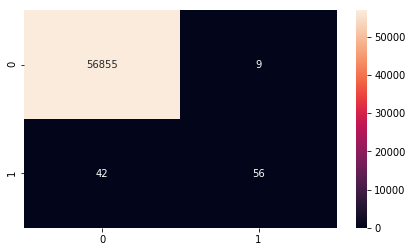

In [ ]:
#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(25))

        Actual  Predicted
43428        1          1
49906        0          0
29474        0          0
276481       0          0
278846       0          0
101565       0          0
260880       0          0
214337       0          0
201575       0          0
81055        0          0
134976       0          0
237701       0          0
256836       0          0
97650        0          0
158290       0          0
246697       0          0
68279        0          0
267585       0          0
26525        0          0
74422        0          0
206357       0          0
257395       0          0
283656       0          0
231156       0          0
38442        0          0


Roc Curve evaluation


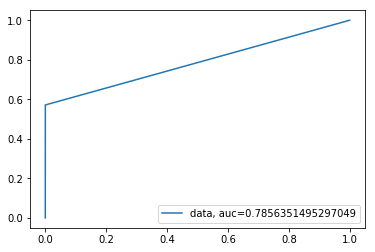

In [ ]:
#ROC curve evaluation
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()